In [1]:
%pylab inline
import csv
#Imports rcParams, which is the inline equivalent of stylesheet properties:
from pylab import rcParams

with open ('FirearmDischargeData.csv') as f:
    records = [row for row in csv.reader(f)]
    
#Removes some annoying whitespace characters:
for i in range(len(records)):
    x = records[i][0].find('\t')
    if(x != -1):
        foo = records[i][0][0:x]+records[i][0][x+1:]
        records[i][0]=foo
        
#Binds the various data sets to some variables for later easy access:
years = records[0][1:]
A = records [1][1:]
B = records [2][1:]
C = records [3][1:]
D = records [4][1:]
E = records [5][1:]
F = records [6][1:]

Populating the interactive namespace from numpy and matplotlib


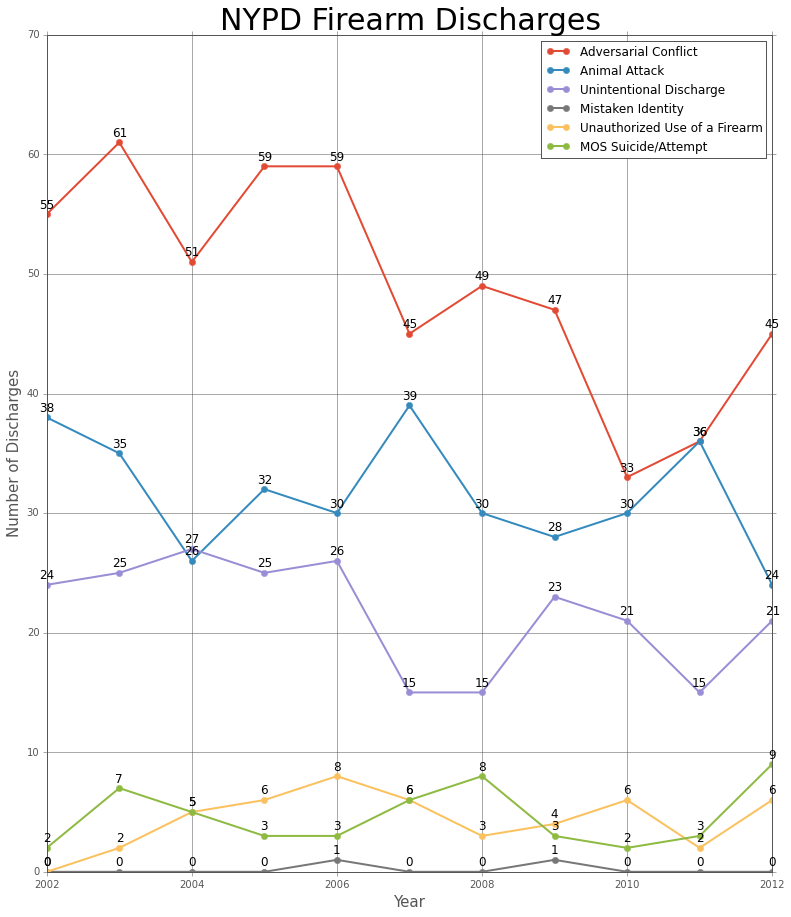

In [11]:
#I was experimenting with making my own stylesheet to alter the appearance of the graph. 
#The creatively named 'mystyle' stylesheet is based on the 'ggplot' stylesheet which comes with matplotlib.
#I have included the stylesheet file with my ipython notebook file, and I imagine that if you changed the 
#style.use() function below to refer to the filepath of the stylesheet on your machine, it would use that one.
#However, if for whatever reason that doesn't work, or if it's just too much trouble, you can always use 'ggplot',
#because to be honest my stylesheet is hardly any different :P
style.use('mystyle')
#Changes the size of the graph. Left inline rather than in the stylesheet so that it can be altered by the user.
rcParams['figure.figsize'] = (13,15)
#Makes a graph base. I used this code instead of just regular plot()s because it allows me to add annotations later.
fig = figure()
ax = fig.add_subplot(111)
#Plot stuff, yayyyyy!
ax.plot(years,A,label='Adversarial Conflict')
ax.plot(years,B,label='Animal Attack')
ax.plot(years,C,label='Unintentional Discharge')
ax.plot(years,D,label='Mistaken Identity')
ax.plot(years,E,label='Unauthorized Use of a Firearm')
ax.plot(years,F,label='MOS Suicide/Attempt')
#Labelslabelslabelslabels
ax.legend()
ax.set_title('NYPD Firearm Discharges',fontsize=30)
ax.set_ylabel('Number of Discharges',fontsize=15)
ax.set_xlabel('Year',fontsize=15)
#This bit was the most interesting thing I did. Since matplotlib for SOME reason doesn't come with a built-in way
#to make value labels appear on the graph itself instead of just on the axes, I turned to the all-knowing Google
#and discovered this trick on http://stackoverflow.com/questions/22272081/label-python-data-points-on-plot.
for x in (A,B,C,D,E,F): #runs through each of the data sets
    for i,j in zip(years,x): #selects the year and the corresponding y value (number of firearm discharges)
        ax.annotate('{}'.format(j), xy=(i,int(j)+0.5),horizontalalignment='center', fontsize='12') 
        #and the last line annotates the points on that line accordingly, using what I thought was some rather clever 
        #string formatting and such. Props to that stackoverflow user for coming up with this. The opposite
        #of props to the makers of matplotlib for not including this functionality in an easier way.